In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


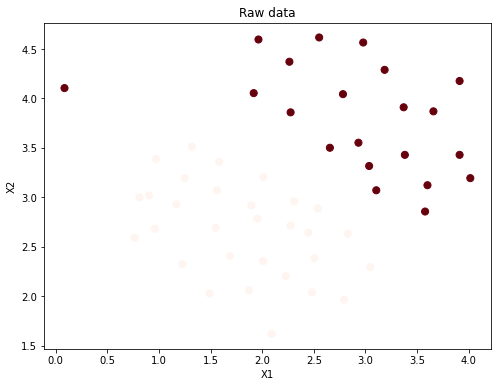

In [4]:
# visualize data
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

## C=1

In [5]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1','X2']], data['y'])
svc1.score(data[['X1','X2']], data['y'])

D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [6]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

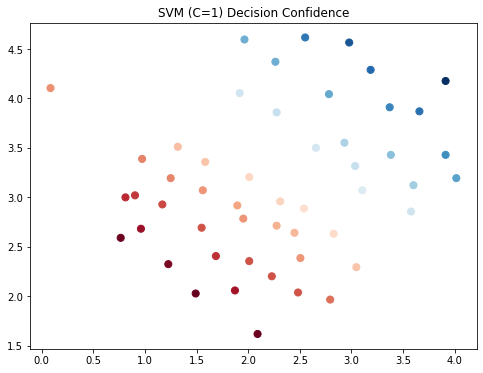

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

##  $C=100$¶
with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [8]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

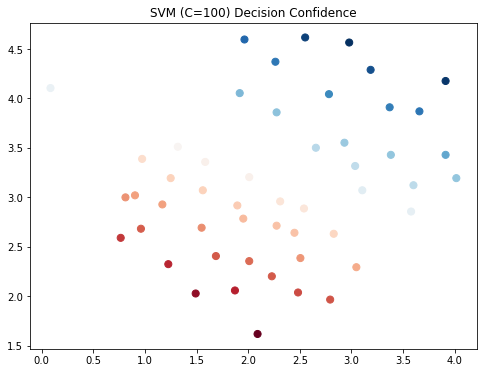

In [11]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [13]:
data

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.964300,4.5957,1,0.804111,3.624193
1,2.275300,3.8589,1,0.386233,1.742547
2,2.978100,4.5651,1,1.379604,4.670522
3,2.932000,3.5519,1,0.524342,1.550734
4,3.577200,2.8560,1,0.337842,0.168402
5,4.015000,3.1937,1,0.873120,1.682827
6,3.381400,3.4291,1,0.690184,1.683786
7,3.911300,4.1761,1,1.614482,4.541054
8,2.782200,4.0431,1,0.837005,2.869803
9,2.551800,4.6162,1,1.168853,4.346314


# 2 高斯核函数¶

In [15]:
# kernek function 高斯核函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1 - x2, 2).sum() / (2 * (sigma ** 2)))

In [16]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [17]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [18]:
data.shape

(863, 3)

D:\Anaconda\envs\pytorch\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


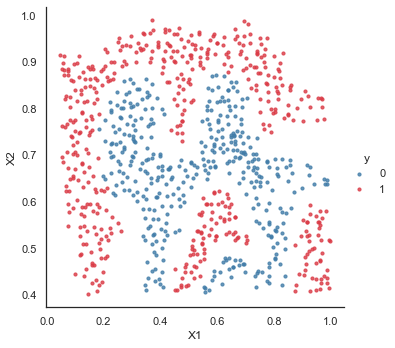

In [19]:
sns.set(context="notebook", style="white", palette=sns.diverging_palette(240, 10, n=2))
sns.lmplot('X1', 'X2', hue='y', data=data, 
           size=5, 
           fit_reg=False, 
           scatter_kws={"s": 10}
          )
plt.show()

### Gaussian Kernel of sklearn

In [21]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [22]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [23]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]

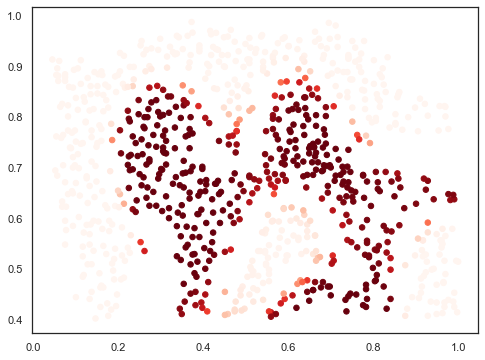

In [24]:

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob, cmap='Reds')
plt.show()

# 3-寻找最优参数

In [25]:
from sklearn.grid_search import GridSearchCV

ModuleNotFoundError: No module named 'sklearn.grid_search'

# 垃圾邮件检测

In [26]:
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import scipy.io as sio

In [27]:
mat_tr = sio.loadmat('data/spamTrain.mat')
mat_tr.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [28]:
X, y = mat_tr.get('X'), mat_tr.get('y').ravel()
X.shape, y.shape

((4000, 1899), (4000,))

In [29]:

mat_test = sio.loadmat('data/spamTest.mat')
mat_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [30]:
test_X, test_y = mat_test.get('Xtest'), mat_test.get('ytest').ravel()
test_X.shape, test_y.shape

((1000, 1899), (1000,))

## fit SVM

In [31]:
svc = svm.SVC()

svc.fit(X, y)

SVC()

In [32]:
pred = svc.predict(test_X)
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       692
           1       0.99      0.97      0.98       308

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



## Linear regression

In [33]:
logit = LogisticRegression()
logit.fit(X, y)

LogisticRegression()

In [34]:
pred = logit.predict(test_X)
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

